## Content

- Sklearn implementation of logistic regression
- Accuracy Metric

- Hyperparameter Tuning

- LogOdds and Logit

- Impact of outliers

- Multiclass classification


## Sklearn Implementation of Logistic regression


Let's load the data of our business case now

In [1]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 116MB/s]


In [2]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


We will choose 5 features for our logistic regression which we selected using simple EDA

You can go through the EDA of this to understand how we selected these features:

https://colab.research.google.com/drive/1nkbiGCMrevDzdSG9yN5bXaxeC8CPJSQg?usp=sharing

In [3]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

Let's split the data into training, validation and testing




In [5]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

We will scale our data before fitting the model

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
model.coef_

array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]])

In [10]:
model.intercept_

array([-0.01215015])

In [11]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

## Accuracy Metric


<img src='https://drive.google.com/uc?id=1idIjt8sYlFbBdGy0udJz_NdAMeX_BAf9' width=800>





<img src='https://drive.google.com/uc?id=15_a3vpK24gFOY4BJHaFovUxMQ9nVWuNd' width=800>





Let's implement our accuracy metric now

In [12]:
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [13]:
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [14]:
accuracy(y_val, model.predict(X_val))

0.6982456140350877

So our model has a validation accuracy of 0.71, or 71.49%

Let's see how we can perform hyperparameter tuning on our logistic regression model


##**Hyperparameter tuning**

We will tune the regularization rate of our model.

You can refer to the documentation for the various list of parameters in logistic regression.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

In [15]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

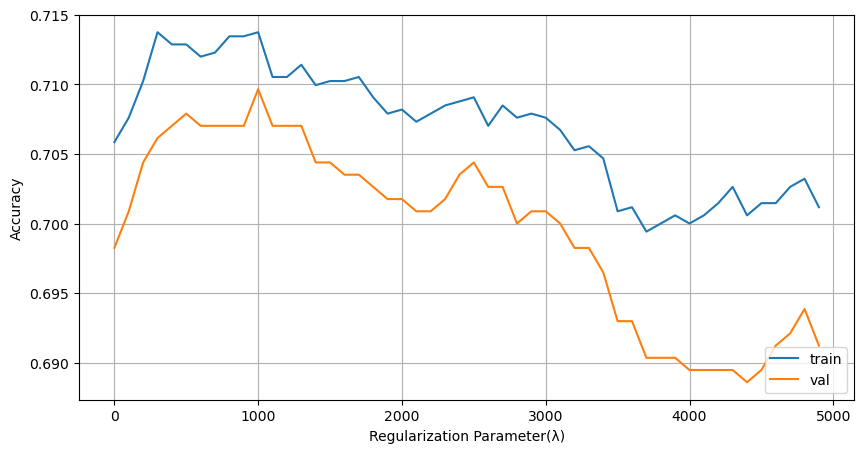

In [16]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


- We see how Validation increases to a peak and then decreases

- Notice as Regularization is increasing, the Accuracy decreasing since model is moving towards Underfit

Let's take lambda value as 1000 for this data and check the
results

In [17]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [18]:
accuracy(y_train, model.predict(X_train))

0.7137426900584796

In [19]:
accuracy(y_val, model.predict(X_val))

0.7096491228070175

We can observe an increase of 0.01, or 1%, in both training and validation data

Let's check our model for test data too

In [20]:
accuracy(y_test, model.predict(X_test))

0.7096491228070175

## Logit/ Log odds


### Log odds interpretation of logistic regression


<img src='https://drive.google.com/uc?id=1z-0qkx0h81U_iwb7fVeFQG0RVkpqyPGy' width=800>





<img src='https://drive.google.com/uc?id=1mruiW2aBWCEMjW74WtAC3_AQoeDZ4EdJ' width=800>



#### Which concept of earlier is this similar to?

Remember, $σ(p)$ also defined probability.

So if we simplify our winning/losing as belonging to class 1/0, then $σ(p)$ here defines the probability of belonging to class 1 (winning class)


<img src='https://drive.google.com/uc?id=1Xpm2xAc1oT95bAzZvRQPUobikSRR2Fgs' width=800>



<img src='https://drive.google.com/uc?id=1XWM57akV5CFtG8JypxDELnpNokU6nLco' width=800>

#### What does this mean geometrically?



<img src='https://drive.google.com/uc?id=17CVyUuT9ZLlsqgWhsyKUChPP0o6Nlw33' width=800>


<img src='https://drive.google.com/uc?id=1F7pWJ-_hmPbEe7LgaJhC9VESNrx0Y24x
' width=800>

To find the probability of the point lying, we simply apply exponential to both sides and solve for p, which would give:

$p=\frac{1}{1+e^{-z}}$

Note: Sigmoid and Logit and just inverse of each other, and both can be used to build a logistic regression model

## Impact of outliers


<img src='https://drive.google.com/uc?id=1aQk_WFojHob2thbycSBBC1hXx2cIL2Lh' width=800>



### Case I: When the outlier lies on the correct side

Now, $\hat{y}=σ(z^i)$


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/753/original/image_2023-06-14_052158593.png?1686700322" height=500 width=600>


<img src='https://drive.google.com/uc?id=1iDeFLogS9rCNs1WiELMsFoRMIx_jRHZ8' width=800>



Since the Loss is very less in this case:

=> The impact of outlier is **very less**

### Case II: When the outlier is on the opposite/wrong side


<img src='https://drive.google.com/uc?id=1SKv32h8SUGk4pbOuS6XQnCv20LMnUV6V' width=800>


Let's say $z^i=-4.3$

So $\hat{y}$ becomes 0.01

Therefore, L = $-log_e(0.01)$

This comes out almost equal to 4.6, which is a very large value

=> The impact of outlier will be **very high**

Thus the best thing is to find the outlier and remove them, so that we get accurate results

## Multi-class classification

Till now we have seen how to use logistic regression to classify between two classes

But in real world there will be cases with many more classes

#### How can we use logistic regression in cases with more than two output classes?


<img src='https://drive.google.com/uc?id=1ZXmXc62oRRLsGOxNVvHi4GWITISWvL16' width=800>




<img src='https://drive.google.com/uc?id=1MSTuz_D9AJUZlHgDqMwQsBsyTLAE2gE7' width=800>



To train these models, we can't use the same dataset, since our data will have three classes.

So we will modify our data for the three models.

Say for model 1, to check whether the input is orange or not,
- Our output column will be modified by replacing the values with orange as 1, and rest values with 0

We will do the same for the other two models


<img src='https://drive.google.com/uc?id=1xCJJoF5j0HJILD0xfhI6hA_1RqwoefHz' width=800>




<img src='https://drive.google.com/uc?id=15kHWLomnIvIkr6EmzB1EiDpAddlOQ-q2' width=800>



#### Now given an input point, how to predict which class it belongs to?



<img src='https://drive.google.com/uc?id=1RTcgUwMq12FlqHJBH3l0jl91mbfCMQxv' width=800>



Let's see an implementation of the same using sklearn

### Sklearn Code implementation for MultiClass Classification

Importing libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

Creating some data with multiple classes

In [22]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


Plotting the data

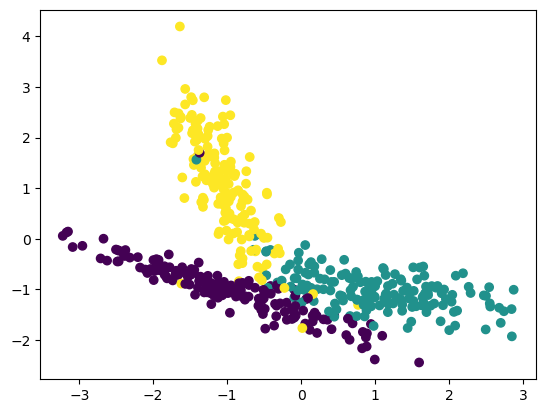

In [23]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Splitting the data into train validation and test set

In [24]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

training the OneVsRest Logistic Regression model

In [25]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/Users/debnsuma/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

Checking the Accuracy of Training, validation and Test dataset

In [26]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


Creating Hyperplane of OVR LogisticRegression for the entire data

In [27]:
X

array([[-1.06046348e+00, -9.46151693e-01],
       [-1.07328735e+00,  1.12579697e+00],
       [-1.30251507e+00,  1.27609317e+00],
       [-9.82024695e-01, -1.41943709e-02],
       [ 1.10608927e+00, -5.78336994e-01],
       [ 1.68740640e-01, -1.23179638e+00],
       [-1.10643431e+00, -9.73680424e-01],
       [ 4.23058277e-02, -1.01173227e+00],
       [-1.27793724e+00, -8.24138962e-01],
       [-9.65763076e-01, -9.58893538e-01],
       [-7.24877888e-01,  7.74568331e-01],
       [ 3.94484197e-01, -1.02280544e+00],
       [-1.42880776e+00,  2.27597716e+00],
       [-1.48473818e+00, -5.97862989e-01],
       [-5.06213921e-01, -1.17932620e+00],
       [ 3.16059359e-01, -8.01995782e-01],
       [-5.24452044e-01, -5.90589105e-01],
       [-1.07565483e+00,  1.19021951e+00],
       [ 1.66390609e+00, -7.30037480e-01],
       [ 6.58706788e-01, -1.52760674e+00],
       [ 9.19890507e-01, -1.18593296e+00],
       [-1.24549170e+00,  1.62332518e+00],
       [-1.00278261e+00,  1.35164489e+00],
       [ 1.

In [28]:

n_labels = len(np.unique(y_train))

for i in range(n_labels):
    sub_model = LogisticRegression(penalty=model.penalty, C=model.C)
    sub_model.coef_ = model.coef_[i].reshape(1, -1)
    sub_model.intercept_ = model.intercept_[i].reshape(-1, 1)
    sub_model.classes_ = np.array([0, 1])

    y_train_ovr = np.where(y_train == i, 1, 0)
    score = sub_model.score(X_train, y_train_ovr)

    print(f"OVR for label={i}, score={score:.4f}")

OVR for label=0, score=0.9664
OVR for label=1, score=0.9060
OVR for label=2, score=0.9362


/var/folders/sg/qf1dw3cs4q5007gb2_9zd8600000gr/T/ipykernel_88369/2755768280.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


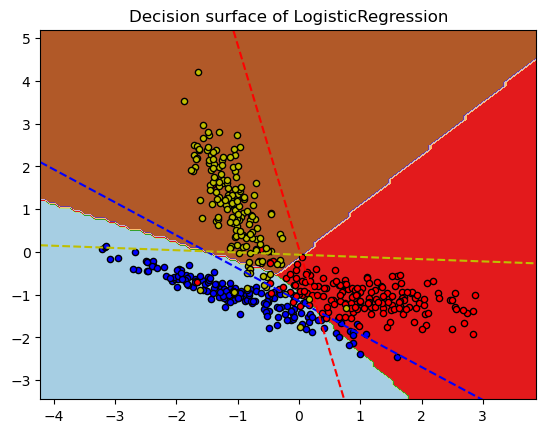

In [29]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

**Observe**

We can see how One-vs-Rest Logistic Regression is able to classify Multi-class Classification data